In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import h5py

In [2]:
window_size=10

In [3]:
test = h5py.File('../code/rec1501612590_export.hdf5', 'r')

In [4]:
predictions_lstm = torch.load("./predictions_lstm.pt", weights_only=True).tolist()
predictions_trans = torch.load("./predictions_trans.pt", weights_only=True).tolist()

## LSTM vs Transformer

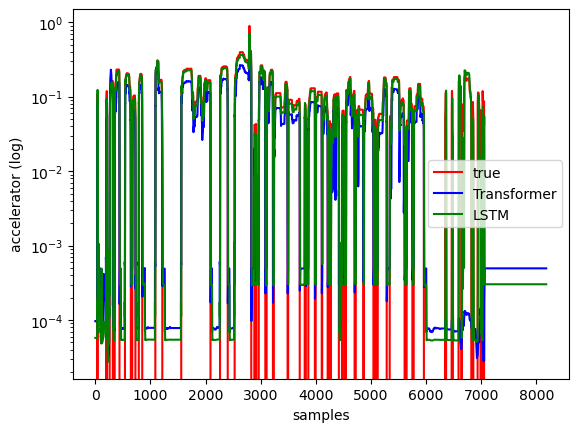

In [5]:
accelerations_trans = [element[0] for element in predictions_trans]
accelerations_lstm = [element[0] for element in predictions_lstm]

truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
plt.plot(truth, color='r', label='true')
plt.plot(accelerations_trans, color='b', label='Transformer')
plt.plot(accelerations_lstm, color='g', label='LSTM')
plt.xlabel('samples')
plt.ylabel('accelerator (log)')
plt.yscale('log')
plt.legend()
plt.savefig('acc_compared_300.png')
plt.show()

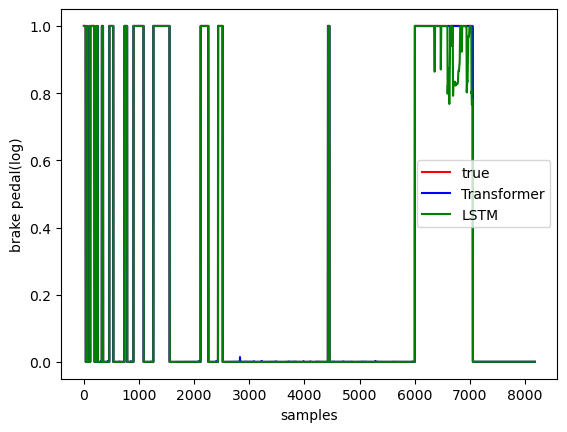

In [6]:
brakes_trans = [element[1] for element in predictions_trans]
brakes_lstm = [element[1] for element in predictions_lstm]
truth = test['brake_pedal_status'][window_size:].tolist()
plt.plot(truth, color='r', label='true')
plt.plot(brakes_trans, color='b', label='Transformer')
plt.plot(brakes_lstm, color='g', label='LSTM')

plt.xlabel('samples')
plt.ylabel('brake pedal(log)')
plt.legend()
plt.savefig('brk_compared_300.png')
plt.show()

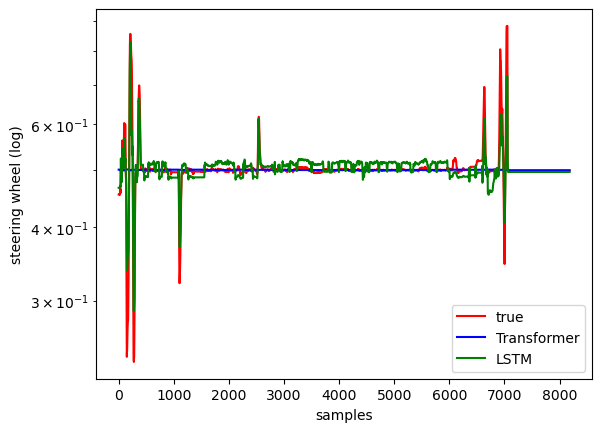

In [7]:
steers_trans = [element[2] for element in predictions_trans]
steers_lstm = [element[2] for element in predictions_lstm]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
plt.plot(truth[:], color='r', label='true')
plt.plot(steers_trans, color='b', label='Transformer')
plt.plot(steers_lstm, color='g', label='LSTM')
plt.xlabel('samples')
plt.ylabel('steering wheel (log)')
plt.yscale('log')
plt.legend()
plt.savefig('str_compared_300.png', bbox_inches="tight")
plt.show()

## resnet, 1 epoch

In [8]:
predictions_policynet = torch.load("./policynet_pred.pt", weights_only=True)

In [9]:
predictions_cnn_1 = torch.load("./predictions_cnn_1.pt", weights_only=True).tolist()

In [10]:
predictions_swin = torch.load("./policynet_swin_pred.pt", weights_only=True)

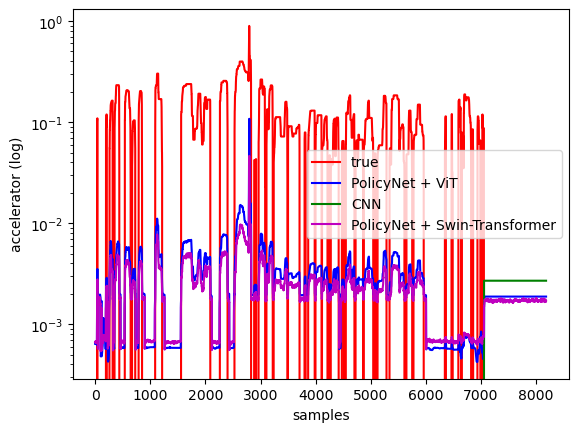

In [11]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet = [element[0] for element in predictions_policynet]
acc_cnn_1 = [element[0][0] for element in predictions_cnn_1]
acc_swin = [element[0] for element in predictions_swin]
acc_error_vit = np.abs(np.subtract(acc_policynet, truth))
acc_error_swin = np.abs(np.subtract(acc_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet, color='b', label='PolicyNet + ViT')
plt.plot(acc_cnn_1[window_size:], color='g', label='CNN')
plt.plot(acc_swin, color='m', label="PolicyNet + Swin-Transformer")
plt.xlabel('samples')
plt.ylabel('accelerator (log)')
plt.legend()
plt.yscale('log')
plt.savefig('acc_cnn_pn_1.png')
plt.show()
truth = test['accelerator_pedal_position'][:].tolist()
truth = [x / 100 for x in truth]
acc_error_cnn = np.abs(np.subtract(acc_cnn_1, truth))

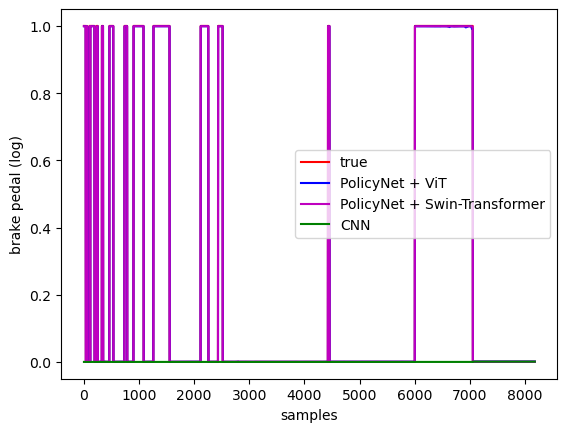

In [12]:
brk_policynet = [element[1] for element in predictions_policynet]
brk_cnn_1 = [element[0][1] for element in predictions_cnn_1]
brk_swin = [element[1] for element in predictions_swin]
truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet, truth))
brk_error_swin = np.abs(np.subtract(brk_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin, color='m', label="PolicyNet + Swin-Transformer")
plt.plot(brk_cnn_1[window_size:], color='g', label='CNN')
plt.xlabel('samples')
plt.ylabel('brake pedal (log)')
plt.legend()
plt.savefig('brk_cnn_pn_1.png')
plt.show()
truth = test['brake_pedal_status'][:].tolist()
brk_error_cnn = np.abs(np.subtract(brk_cnn_1, truth))

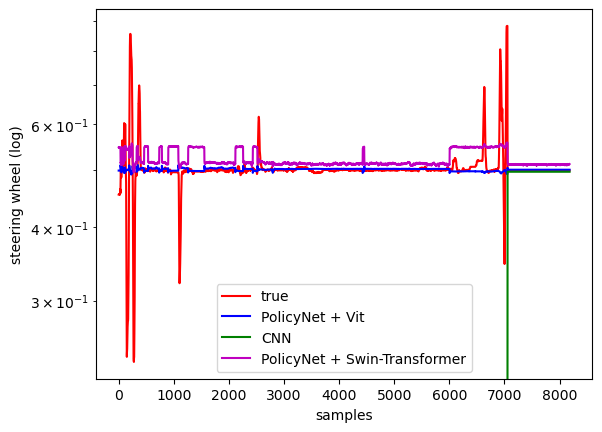

In [13]:
str_policynet = [element[2] for element in predictions_policynet]
str_cnn_1 = [element[0][2] for element in predictions_cnn_1]
str_swin = [element[2] for element in predictions_swin]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet, truth))
str_error_swin = np.abs(np.subtract(str_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_policynet, color='b', label='PolicyNet + Vit')
plt.plot(str_cnn_1[window_size:], color='g', label='CNN')
plt.plot(str_swin, color='m', label="PolicyNet + Swin-Transformer")
plt.xlabel('samples')
plt.ylabel('steering wheel (log)')
plt.legend()
plt.yscale('log')
plt.savefig('str_cnn_pn_1.png', bbox_inches="tight")
plt.show()
truth = test['steering_wheel_angle'][:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_cnn = np.abs(np.subtract(str_cnn_1, truth))

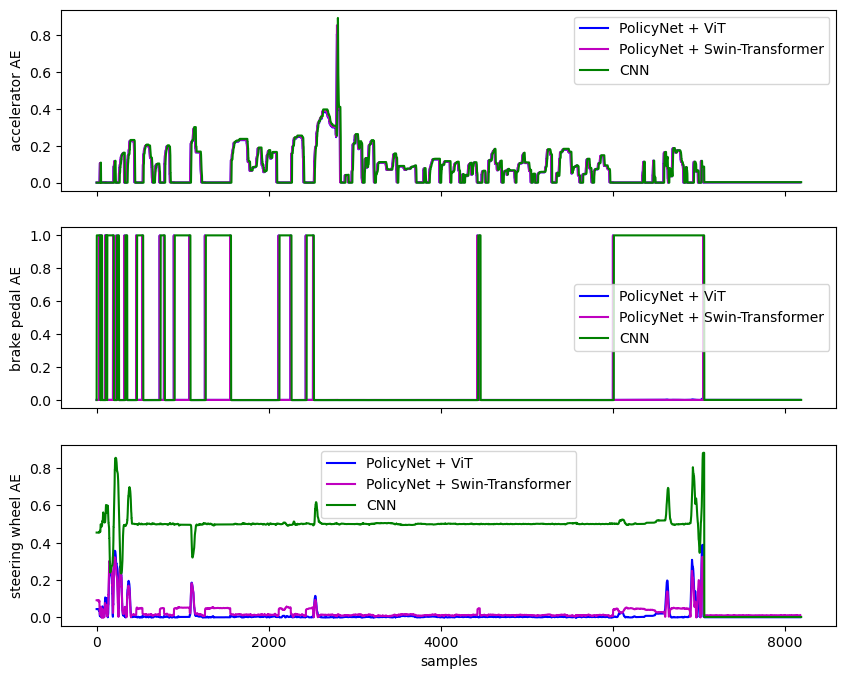

In [14]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].plot(acc_error_cnn, color='g', label='CNN')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].plot(brk_error_cnn, color='g', label='CNN')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].plot(str_error_cnn, color='g', label='CNN')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_cnn_1.png')
plt.show()

## cnn-lstm 1 epoch

In [15]:
predictions_cnnlstm_1 = torch.load("./predictions_cnnlstm_1.pt", weights_only=True).tolist()

In [16]:
predictions_policynet = torch.load("./policynet_pred.pt", weights_only=True)

In [17]:
predictions_swin = torch.load("./policynet_swin_pred.pt", weights_only=True)

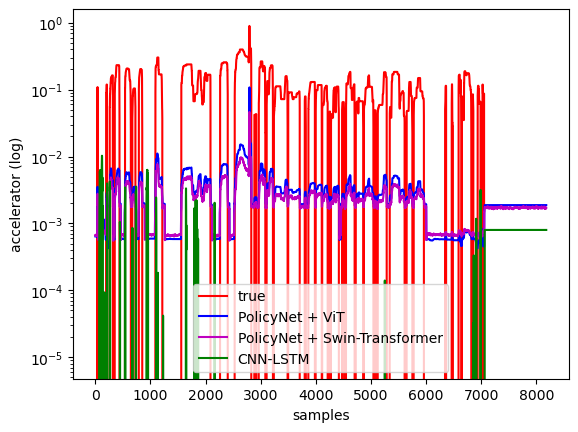

In [18]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet = [element[0] for element in predictions_policynet]
acc_cnnlstm_1 = [element[0] for element in predictions_cnnlstm_1]
acc_swin = [element[0] for element in predictions_swin]
acc_error_vit = np.abs(np.subtract(acc_policynet, truth))
acc_error_swin = np.abs(np.subtract(acc_swin, truth))
acc_error_cnnlstm = np.abs(np.subtract(acc_cnnlstm_1, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet, color='b', label='PolicyNet + ViT')
plt.plot(acc_swin, color='m', label='PolicyNet + Swin-Transformer')
plt.plot(acc_cnnlstm_1, color='g', label='CNN-LSTM')
plt.xlabel('samples')
plt.ylabel('accelerator (log)')
plt.legend()
plt.yscale('log')
plt.savefig('acc_cnnlstm_pn_1.png')
plt.show()

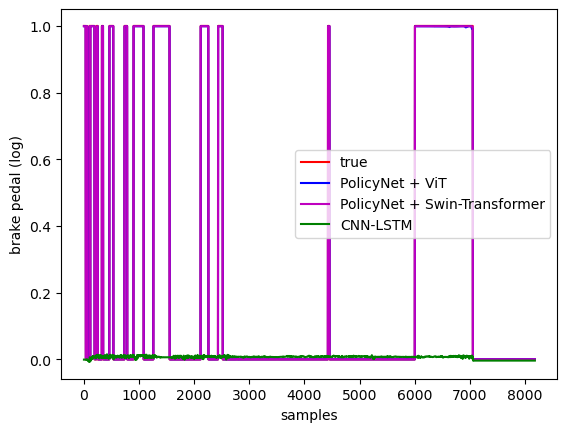

In [19]:
brk_policynet = [element[1] for element in predictions_policynet]
brk_cnnlstm_1 = [element[1] for element in predictions_cnnlstm_1]
brk_swin = [element[1] for element in predictions_swin]
truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet, truth))
brk_error_swin = np.abs(np.subtract(brk_swin, truth))
brk_error_cnnlstm = np.abs(np.subtract(brk_cnnlstm_1, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin, color='m', label='PolicyNet + Swin-Transformer')
plt.plot(brk_cnnlstm_1, color='g', label='CNN-LSTM')
plt.xlabel('samples')
plt.ylabel('brake pedal (log)')
plt.legend()
plt.savefig('brk_cnnlstm_pn_1.png')
plt.show()

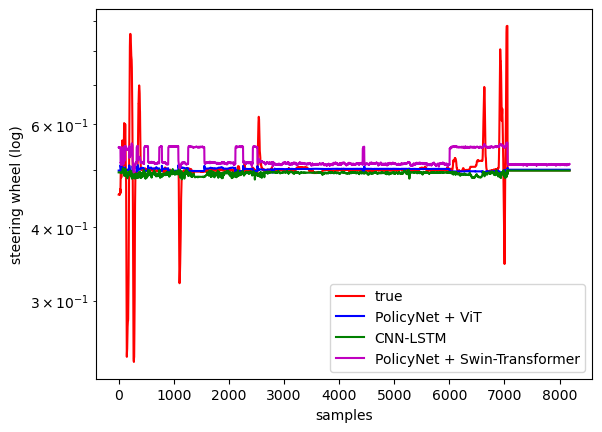

In [20]:
str_policynet = [element[2] for element in predictions_policynet]
str_cnnlstm_1 = [element[2] for element in predictions_cnnlstm_1]
str_swin = [element[2] for element in predictions_swin]

truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet, truth))
str_error_swin = np.abs(np.subtract(str_swin, truth))
str_error_cnnlstm = np.abs(np.subtract(str_cnnlstm_1, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_policynet, color='b', label='PolicyNet + ViT')
plt.plot(str_cnnlstm_1, color='g', label='CNN-LSTM')
plt.plot(str_swin, color='m', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('steering wheel (log)')
plt.legend()
plt.yscale('log')
plt.savefig('str_cnnlstm_pn_1.png', bbox_inches="tight")
plt.show()

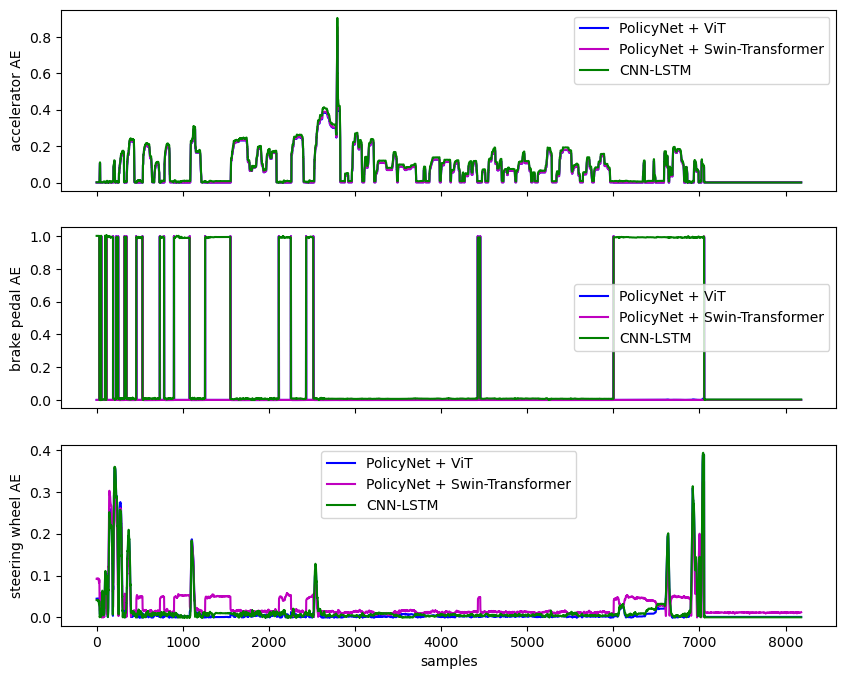

In [21]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].plot(acc_error_cnnlstm, color='g', label='CNN-LSTM')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].plot(brk_error_cnnlstm, color='g', label='CNN-LSTM')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].plot(str_error_cnnlstm, color='g', label='CNN-LSTM')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_cnnlstm_1.png')
plt.show()

## cnn, 300 epochs

In [22]:
predictions_policynet_300 = torch.load("./300/pn_predictions_300.pt", weights_only=True)
print(len(predictions_policynet_300))

8182


In [23]:
predictions_cnn_300 = torch.load("./300/predictions_cnn_300.pt", weights_only=True).tolist()

In [24]:
predictions_swin_300 = torch.load("./300/swin_predictions_300.pt", weights_only=True).tolist()

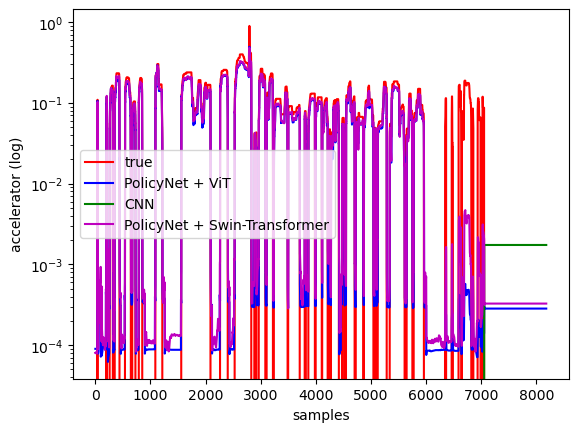

In [25]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet_300 = [element[0] for element in predictions_policynet_300]
acc_cnn_300 = [element[0][0] for element in predictions_cnn_300]
acc_swin_300 = [element[0] for element in predictions_swin_300]
acc_error_vit = np.abs(np.subtract(acc_policynet_300, truth))
acc_error_swin = np.abs(np.subtract(acc_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(acc_cnn_300[window_size:], color='g', label='CNN')
plt.plot(acc_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('accelerator (log)')
plt.legend()
plt.yscale('log')
plt.savefig('acc_cnn_pn_300.png')
plt.show()
truth = test['accelerator_pedal_position'][:].tolist()
truth = [x / 100 for x in truth]
acc_error_cnn = np.abs(np.subtract(acc_cnn_300, truth))

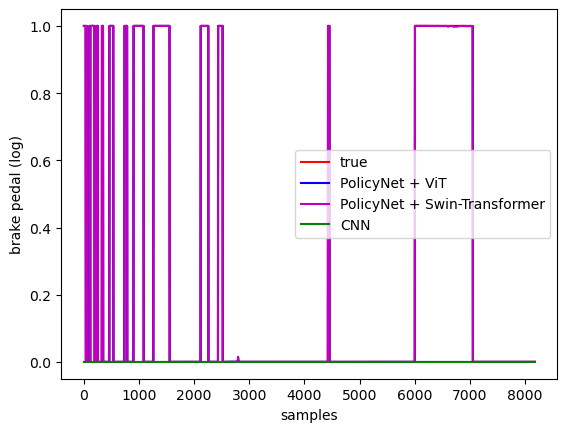

In [26]:
brk_policynet_300 = [element[1] for element in predictions_policynet_300]
brk_cnn_300 = [element[0][1] for element in predictions_cnn_300]
brk_swin_300 = [element[1] for element in predictions_swin_300]

truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet_300, truth))
brk_error_swin = np.abs(np.subtract(brk_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.plot(brk_cnn_300[window_size:], color='g', label='CNN')
plt.xlabel('samples')
plt.ylabel('brake pedal (log)')
plt.legend()
plt.savefig('brk_cnn_pn_300.png')
plt.show()
truth = test['brake_pedal_status'][:].tolist()
brk_error_cnn = np.abs(np.subtract(brk_cnn_300, truth))

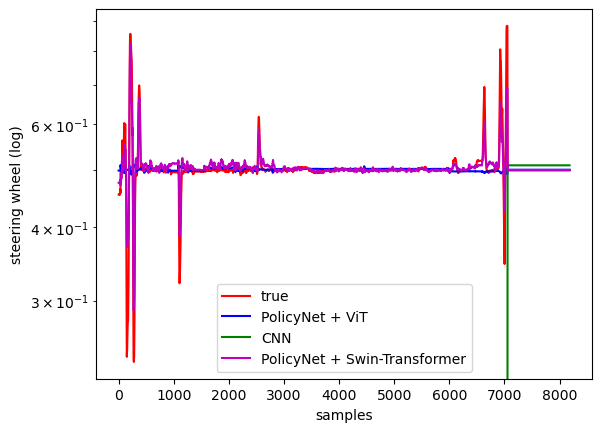

In [27]:
str_policynet_300 = [element[2] for element in predictions_policynet]
str_cnn_300 = [element[0][2] for element in predictions_cnn_300]
str_swin_300 = [element[2] for element in predictions_swin_300]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet_300, truth))
str_error_swin = np.abs(np.subtract(str_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(str_cnn_300[window_size:], color='g', label='CNN')
plt.plot(str_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('steering wheel (log)')
plt.legend()
plt.yscale('log')
plt.savefig('str_cnn_pn_300.png', bbox_inches="tight")
plt.show()
truth = test['steering_wheel_angle'][:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_cnn = np.abs(np.subtract(str_cnn_1, truth))

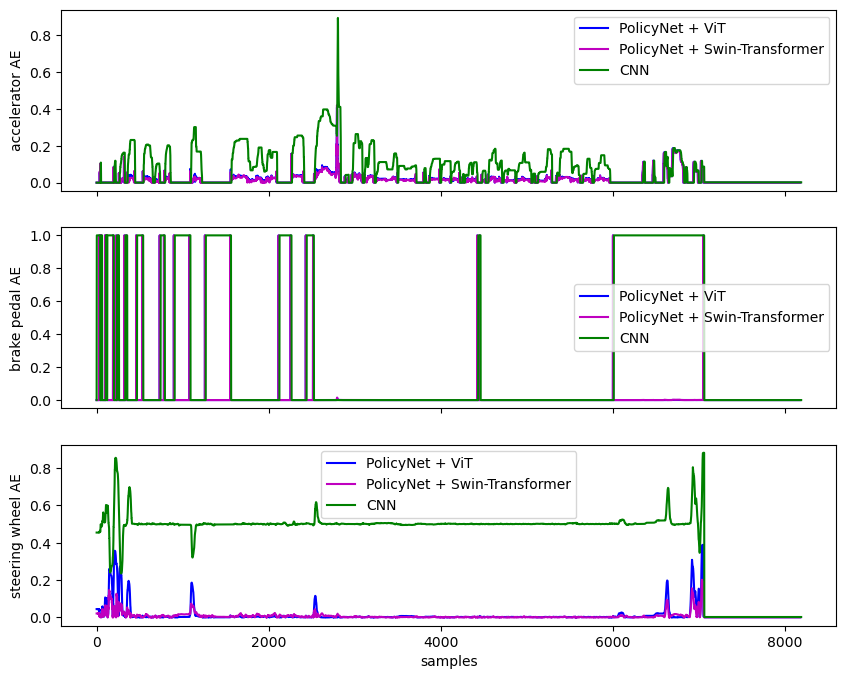

In [28]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].plot(acc_error_cnn, color='g', label='CNN')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].plot(brk_error_cnn, color='g', label='CNN')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].plot(str_error_cnn, color='g', label='CNN')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_cnn_300.png')
plt.show()

## cnnlstm, 300 epochs

In [29]:
predictions_policynet_300 = torch.load("./300/pn_predictions_300.pt", weights_only=True)

In [30]:
predictions_cnnlstm_300 = torch.load("./300/predictions_cnnlstm_300.pt", weights_only=True).tolist()
print(len(predictions_cnnlstm_300))

8182


In [31]:
predictions_swin_300 = torch.load("./300/swin_predictions_300.pt", weights_only=True).tolist()

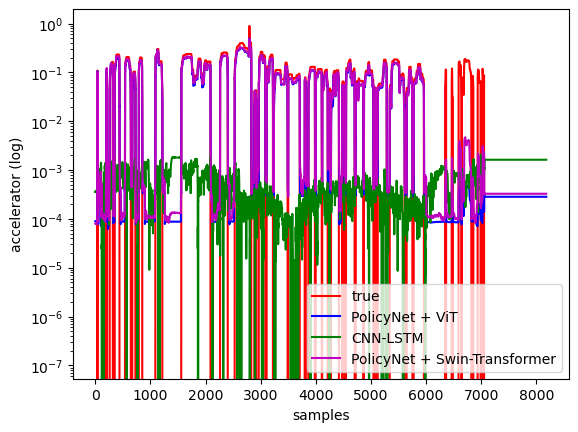

In [32]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet_300 = [element[0] for element in predictions_policynet_300]
acc_cnnlstm_300 = [element[0] for element in predictions_cnnlstm_300]
acc_swin_300 = [element[0] for element in predictions_swin_300]
acc_error_vit = np.abs(np.subtract(acc_policynet_300, truth))
acc_error_swin = np.abs(np.subtract(acc_swin_300, truth))
acc_error_cnnlstm = np.abs(np.subtract(acc_cnnlstm_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(acc_cnnlstm_300, color='g', label='CNN-LSTM')
plt.plot(acc_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('accelerator (log)')
plt.legend()
plt.yscale('log')
plt.savefig('acc_cnnlstm_pn_300.png')
plt.show()

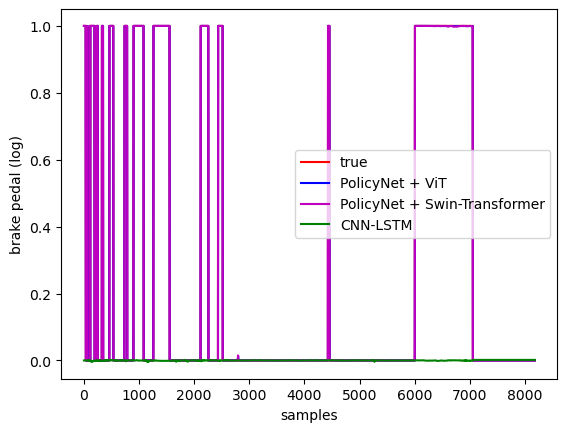

In [33]:
brk_policynet_300 = [element[1] for element in predictions_policynet_300]
brk_cnnlstm_300 = [element[1] for element in predictions_cnnlstm_300]
brk_swin_300 = [element[1] for element in predictions_swin_300]
truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet_300, truth))
brk_error_swin = np.abs(np.subtract(brk_swin_300, truth))
brk_error_cnnlstm = np.abs(np.subtract(brk_cnnlstm_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.plot(brk_cnnlstm_300, color='g', label='CNN-LSTM')
plt.xlabel('samples')
plt.ylabel('brake pedal (log)')
plt.legend()
plt.savefig('brk_cnnlstm_pn_300.png')
plt.show()

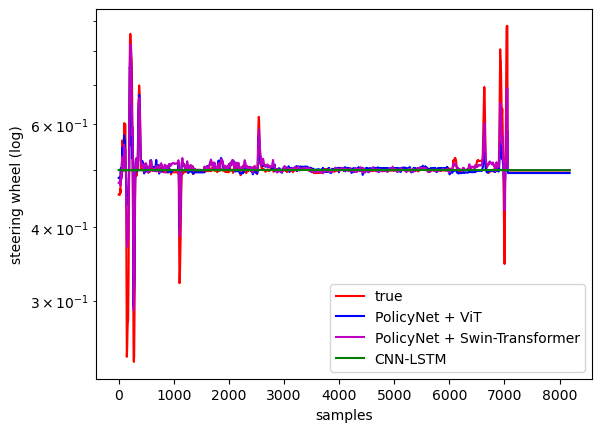

In [34]:
str_policynet_300 = [element[2] for element in predictions_policynet_300]
str_cnnlstm_300 = [element[2] for element in predictions_cnnlstm_300]
str_swin_300 = [element[2] for element in predictions_swin_300]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet_300, truth))
str_error_swin = np.abs(np.subtract(str_swin_300, truth))
str_error_cnnlstm = np.abs(np.subtract(str_cnnlstm_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(str_swin_300, color='m', label='PolicyNet + Swin-Transformer')
plt.plot(str_cnnlstm_300, color='g', label='CNN-LSTM')
plt.xlabel('samples')
plt.ylabel('steering wheel (log)')
plt.legend()
plt.yscale('log')
plt.savefig('str_cnnlstm_pn_300.png', bbox_inches="tight")
plt.show()

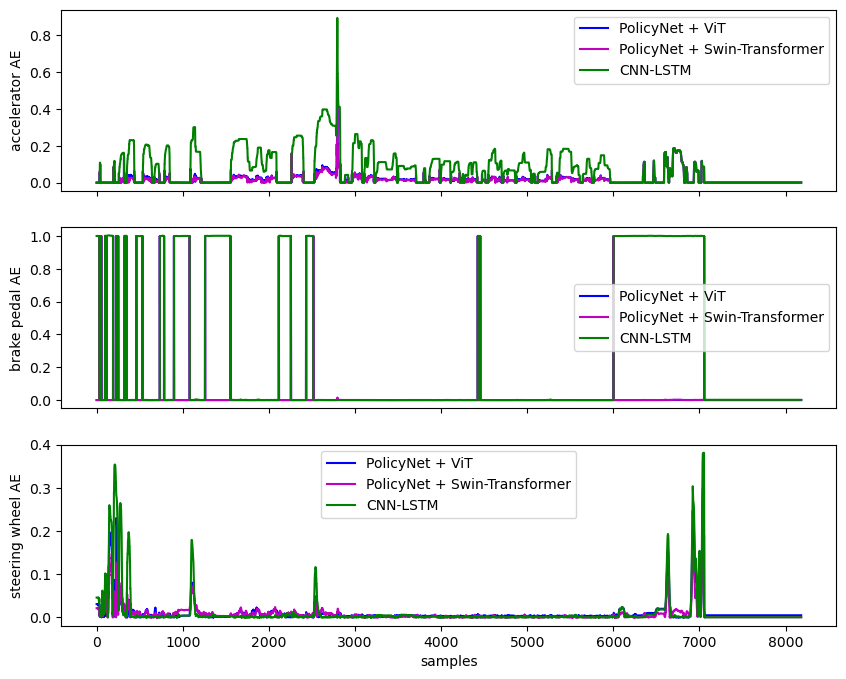

In [35]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].plot(acc_error_cnnlstm, color='g', label='CNN-LSTM')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].plot(brk_error_cnnlstm, color='g', label='CNN-LSTM')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].plot(str_error_cnnlstm, color='g', label='CNN-LSTM')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_cnnlstm_300.png')
plt.show()

## ViT vs Swin

In [36]:
predictions_policynet_300 = torch.load("./300/pn_predictions_300.pt", weights_only=True)

In [37]:
predictions_swin_300 = torch.load("./300/swin_predictions_300.pt", weights_only=True).tolist()

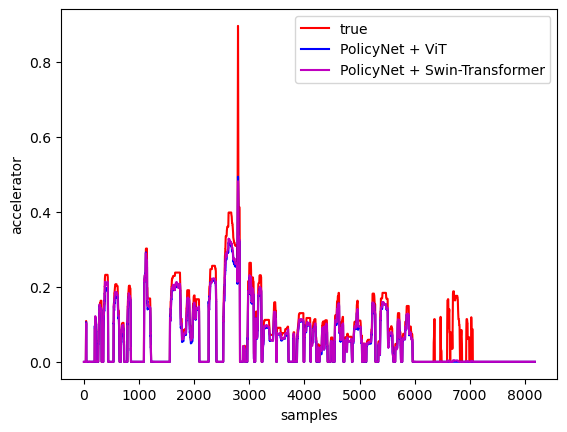

In [38]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet_300 = [element[0] for element in predictions_policynet_300]
acc_swin_300 = [element[0] for element in predictions_swin_300]
acc_error_vit = np.abs(np.subtract(acc_policynet_300, truth))
acc_error_swin = np.abs(np.subtract(acc_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(acc_swin_300, color = 'm', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('accelerator')
plt.legend()
plt.savefig('acc_swin_vit_300.png')
plt.show()

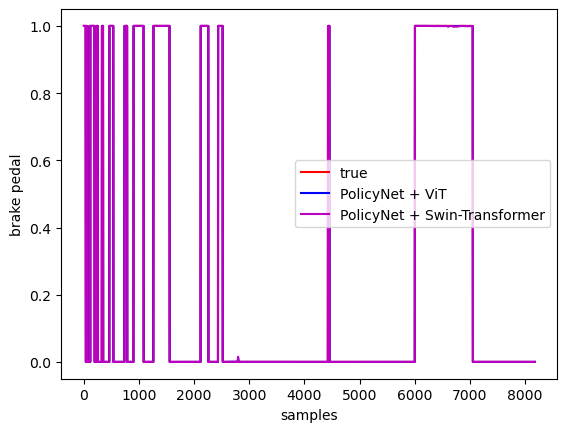

In [39]:
brk_policynet_300 = [element[1] for element in predictions_policynet_300]
brk_swin_300 = [element[1] for element in predictions_swin_300]
truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet_300, truth))
brk_error_swin = np.abs(np.subtract(brk_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet_300, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin_300, color = 'm', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('brake pedal')
plt.legend()
plt.savefig('brk_swin_vit_300.png')
plt.show()

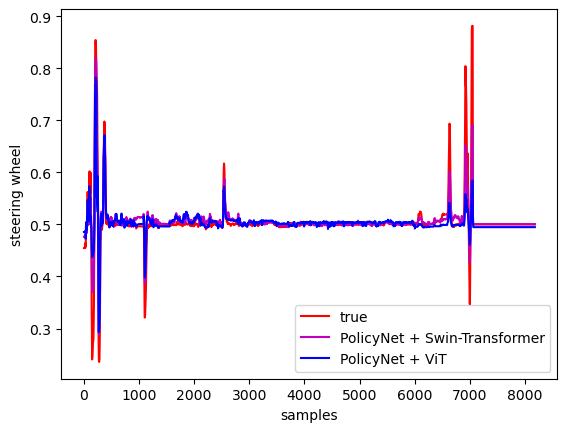

In [40]:
str_policynet_300 = [element[2] for element in predictions_policynet_300]
str_swin_300 = [element[2] for element in predictions_swin_300]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet_300, truth))
str_error_swin = np.abs(np.subtract(str_swin_300, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_swin_300, color = 'm', label='PolicyNet + Swin-Transformer')
plt.plot(str_policynet_300, color='b', label='PolicyNet + ViT')
plt.xlabel('samples')
plt.ylabel('steering wheel')
plt.legend()
plt.savefig('str_swin_vit_300.png')
plt.show()

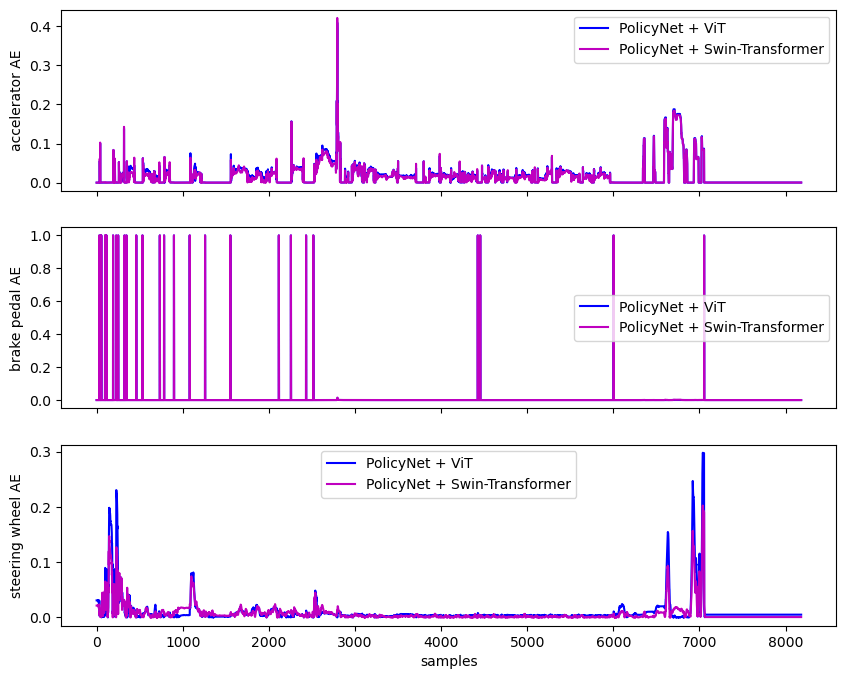

In [41]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_vit_swin_300.png')
plt.show()

## ViT vs Swin, 1 epoch

In [42]:
predictions_policynet = torch.load("./policynet_pred.pt", weights_only=True)

In [43]:
predictions_swin = torch.load("./policynet_swin_pred.pt", weights_only=True)

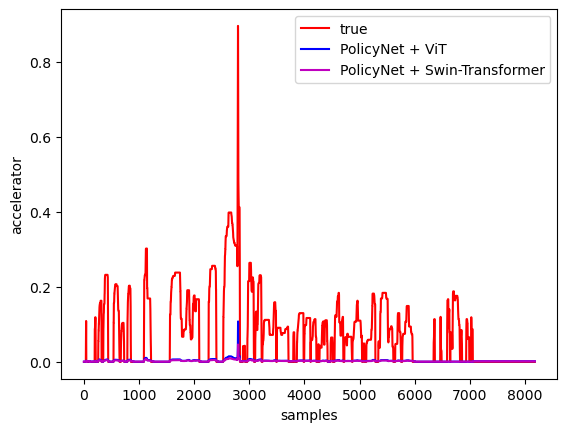

In [44]:
truth = test['accelerator_pedal_position'][window_size:].tolist()
truth = [x / 100 for x in truth]
acc_policynet = [element[0] for element in predictions_policynet]
acc_swin = [element[0] for element in predictions_swin]
acc_error_vit = np.abs(np.subtract(acc_policynet, truth))
acc_error_swin = np.abs(np.subtract(acc_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(acc_policynet, color='b', label='PolicyNet + ViT')
plt.plot(acc_swin, color = 'm', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('accelerator')
plt.legend()
plt.savefig('acc_1_ep.png')
plt.show()

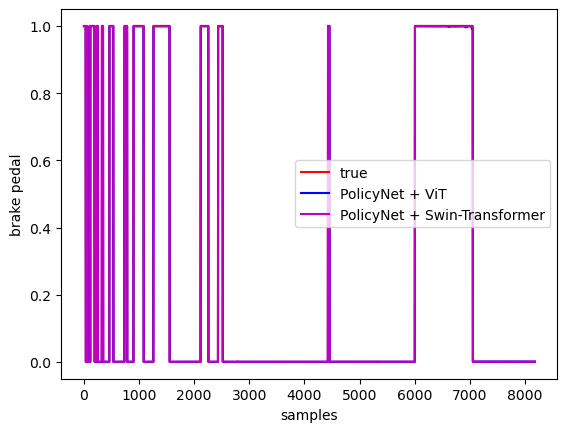

In [45]:
brk_policynet = [element[1] for element in predictions_policynet]
brk_swin = [element[1] for element in predictions_swin]
truth = test['brake_pedal_status'][window_size:].tolist()
brk_error_vit = np.abs(np.subtract(brk_policynet, truth))
brk_error_swin = np.abs(np.subtract(brk_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(brk_policynet, color='b', label='PolicyNet + ViT')
plt.plot(brk_swin, color = 'm', label='PolicyNet + Swin-Transformer')
plt.xlabel('samples')
plt.ylabel('brake pedal')
plt.legend()
plt.savefig('brk_1_ep')
plt.show()

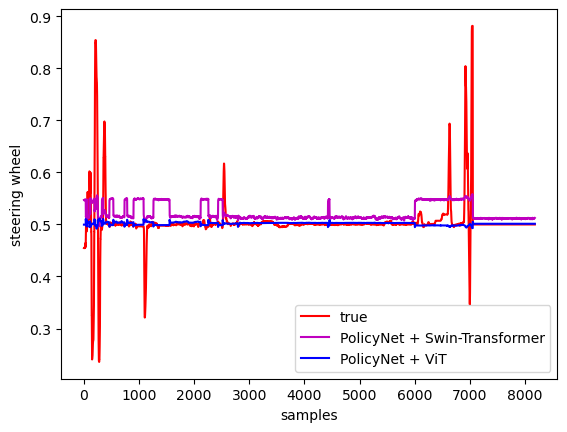

In [46]:
str_policynet = [element[2] for element in predictions_policynet]
str_swin = [element[2] for element in predictions_swin]
truth = test['steering_wheel_angle'][window_size:].tolist()
truth = [(x + 600) / 1200 for x in truth]
str_error_vit = np.abs(np.subtract(str_policynet, truth))
str_error_swin = np.abs(np.subtract(str_swin, truth))
plt.plot(truth, color='r', label='true')
plt.plot(str_swin, color = 'm', label='PolicyNet + Swin-Transformer')
plt.plot(str_policynet, color='b', label='PolicyNet + ViT')
plt.xlabel('samples')
plt.ylabel('steering wheel')
plt.legend()
plt.savefig('str_1_ep.png')
plt.show()

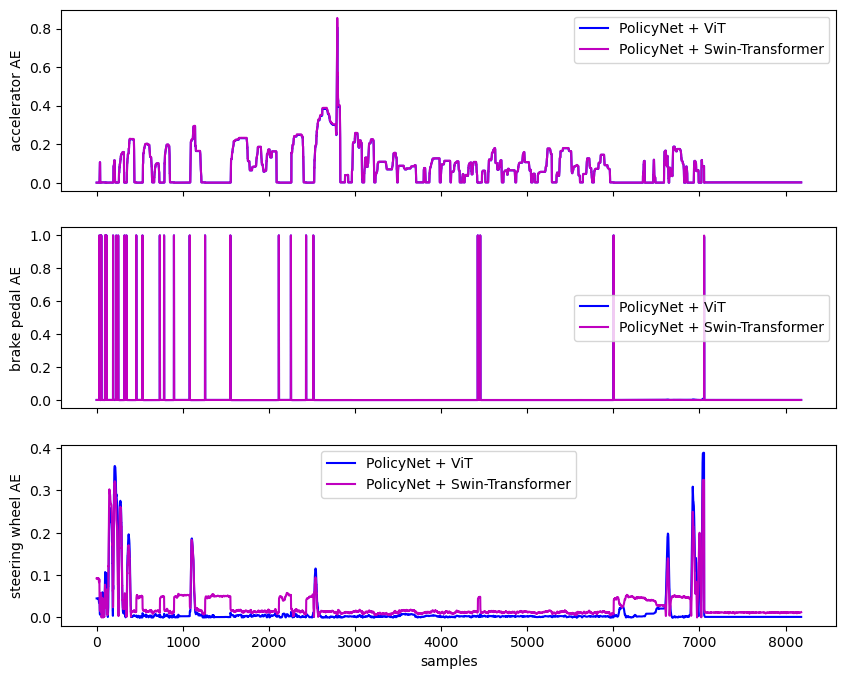

In [47]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10, 8))
axs[0].plot(acc_error_vit, color='b', label='PolicyNet + ViT')
axs[0].plot(acc_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[0].set_ylabel('accelerator AE')
axs[0].legend()
axs[1].plot(brk_error_vit, color='b', label='PolicyNet + ViT')
axs[1].plot(brk_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[1].set_ylabel('brake pedal AE')
axs[1].legend()
axs[2].plot(str_error_vit, color='b', label='PolicyNet + ViT')
axs[2].plot(str_error_swin, color='m', label='PolicyNet + Swin-Transformer')
axs[2].set_ylabel('steering wheel AE')
axs[2].legend()
plt.xlabel('samples')
plt.legend()
plt.savefig('AE_vit_swin.png')
plt.show()